## INITIALIZATION

In [1]:
%matplotlib notebook
from tjmonopix.tjmonopix import TJMonoPix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
from bitarray import bitarray

##### if HV is on, no_power_reset=True,
##### if GPAC had power reset then no_power_reset=False

chip = TJMonoPix(conf="../tjmonopix/tjmonopix_mio3.yaml",no_power_reset=False)
chip.init(fl="EN_HV")

chip['data_rx'].CONF_START_FREEZE = 64 #default 3
chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
chip['data_rx'].CONF_START_READ = 66 #default 6
chip['data_rx'].CONF_STOP_READ = 68 #default 7
chip['data_rx'].CONF_STOP = 105 #default 45


2022-01-24 08:54:39,170 [INFO ] (MainThread) GPAC: power reset
2022-01-24 08:54:40,940 [INFO ] (MainThread) Found adapter card: General Purpose Analog Card (GPAC) with ID 3
2022-01-24 08:54:41,177 [INFO ] (MainThread) Found board 0 running firmware version 0.0
2022-01-24 08:54:41,394 [INFO ] (MainThread) ibias = 45
2022-01-24 08:54:41,410 [INFO ] (MainThread) ibias = 503.125nA
2022-01-24 08:54:42,010 [INFO ] (MainThread) {'VPC [V]': 1.2993515804695306, 'VDDA_DAC [mA]': 3.002966091804109, 'VDDP [V]': 1.8049802771084336, 'VDDP OC': False, 'VDDA [mA]': 49.13820989930726, 'VDDD [V]': 1.8015140363636364, 'VDDA_DAC OC': False, 'VDDD [mA]': 2.820288999038665e-08, 'VPCSWSF [V]': 0.5001542395802099, 'VDDP [mA]': 128.39714805315754, 'BiasSF [V]': 1.0507776170571204, 'VDDD OC': False, 'VPC [mA]': -0.27699877442592874, 'VPCSWSF [mA]': -0.009504710182465091, 'VDDA [V]': 1.8048574894894895, 'VDDA OC': False, 'VDDA_DAC [V]': 1.8035484515484517, 'BiasSF [mA]': 0.10059447096451782}


## POWER_STATUS

In [2]:
#chip['BiasSF'].set_current(100, unit='uA') # SET THE SOURCE FOLLOWER READOUT CURRENT
chip.get_power_status()

{'BiasSF [V]': 1.0537782852856015,
 'BiasSF [mA]': 0.10109892318840588,
 'VDDA OC': False,
 'VDDA [V]': 1.8048574894894895,
 'VDDA [mA]': 49.64478938256647,
 'VDDA_DAC OC': False,
 'VDDA_DAC [V]': 1.8035484515484517,
 'VDDA_DAC [mA]': 3.002966091804109,
 'VDDD OC': False,
 'VDDD [V]': 1.8015140363636364,
 'VDDD [mA]': 2.820288999038665e-08,
 'VDDP OC': False,
 'VDDP [V]': 1.8059798142570278,
 'VDDP [mA]': 128.39714805315754,
 'VPC [V]': 1.2993515804695306,
 'VPC [mA]': 0.014999939225105861,
 'VPCSWSF [V]': 0.5001542395802099,
 'VPCSWSF [mA]': 0.21610723753423053}

## ENABLE_COLUMS (SET MASKS, SELECT WHICH COLUMN AND ROW TO INJECT)

In [3]:
# SELECT WHICH DOUBLE COLUMNS TO ENABLE
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_HV'].setall(True)
chip['CONF_SR']['EN_OUT'].setall(False) #ENABLES OR DISABLES THE NORMAL OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['nEN_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['EN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE NORMAL HITOR PADS, HITOR0-3 =  1-4 flavor, ACTIVE LOW
chip['CONF_SR']['nEN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY HITOR PADS, ACTIVE LOW


# SELECT WHICH PHYSICAL COLUMNS, ROWS, DIAGONALS TO MASK
# TO MASK ONE PIXEL, MASKV, MASKH and MASKD OF THIS PIXEL SHOULD BE 0 (FALSE)
# THE MASKD NUMBER OF THE PIXEL WE WANT TO MASK (or UNMASK), IS GIVEN BY: MASKD = PHYSCOL- PHYSROW
# IF PHYSCOL-PHYSROW<0, then MASKD = 448+PHYSCOL-PHYSROW
#chip['CONF_SR']['MASKD'].setall(True)
#chip['CONF_SR']['MASKH'].setall(True)
#chip['CONF_SR']['MASKV'].setall(True)

# TO USE THE MASK FUNCTION YOU MUST INPUT THE FLAVOR, COLUMN AND ROW
# THE FLAVOR NUMERS IS: 0 FOR PMOS_NOSF, 1 FOR PMOS, 2 FOR COMP, 3 FOR HV


# SELECT WHICH PHYSICAL COLUMS TO INJECT
# INJ_IN_MON_L AND INJ_IN_MON_L SELECT THE LEFT AND RIGHT SPECIAL ANALOG MONITORING PIXELS
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)

chip['CONF_SR']['INJ_IN_MON_L'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS LEFT SIDE
chip['CONF_SR']['INJ_IN_MON_R'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS RIGHT SIDE

# SELECT WHICH PHYSICAL ROWS TO INJECT
# THE SPEXIAL PIXELS OUTA_MON3 to OUTA_MON0 CORRESPONT TO ROWS 223 to 220 FOR INJECTION
chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['INJ_ROW'][223:220] = True # FOR THE ANALOG MONITORING TOP PIXEL

# SELECT PHYSICAL COLUMNS AND ROWS FOR INJECTION WITH FUNCTION
#chip.enable_injection(3,18,99)

# SELECT PHYSICAL COLUMN(S) FOR HITOR OUTPUT
# nMASKH (SO SETTING MASKH TO FALSE) ENABLES HITOR FOR THE SPECIFIC ROW
chip['CONF_SR']['DIG_MON_SEL'].setall(False)
#chip.enable_column_hitor(1,18)

chip.write_conf()

## CONFIGURE THE FRONT END CURRENT AND VOLTAGE BIASES, CONFIGURE THE HEIGHT OF THE INJECTION PULSE

In [5]:
## SET THE INJECTION PULSE AMPLITUDE
## 128-bit DAC (7-bit binary equivalent)
## SET THE VOLTAGES IN ONE HOT ENCODING, ONLY ONE BIT ACTIVE AT A TIME.
## V = (127/1.8)*#BIT
# The default values are VL=44, VH=79, VH-VL=35
# VDAC LSB=14.17mV, Cinj=230aF, 1.43e-/mV, ~710e-
CALCAP=33 ## 33 or 14.17E-3*230E-18/1.602E-19=20.3
chip.set_vl_dacunits(40,1)
chip.set_vh_dacunits(80,1)

####### CONFIGURE THE FRONT END ######

# SET VRESET_P, THIS IS THE BASELINE OF THE FRONT END INPUT, ONE HOT ENCODING
chip.set_vreset_dacunits(35,1) #1V

## 128-bit DAC (7-bit binary equivalent)
## SET THE CURRENTS USING THERMOMETER ENCODING, I = #BITS_ACTIVE*140nA*SCALING, SCALING IS DIFFERENT FOR EACH CURRENT
## SCALING: IBIAS=10, IDB=16, ITHR=0.125, ICASN=4, IRESET=0.03125
## ACTIVE BITS SHOULD BE SET STARTING FROM THE MIDDLE e.g. for 15 active bits, (128-15)/2=56,5 so 56zeros,15ones,57zeros
## Thus, Ix[71:57] = True

# SET ICASN, THIS CURRENT CONTROLS THE OUTPUT BASELINE, BE CAREFUL NOT TO SET IT TO HIGH
# ALWAYS MONITOR THE POWER AFTER SETTING ICASN. IF VDDD IS SEVERAL mA, REDUCE IT UNTIL IT RETURNS TO 0
# ICASN MAINLY CONTROLS THE THRESHOLD
chip.set_icasn_dacunits(0,1) #4.375nA # approx 1.084V at -3V backbias, 600mV at 0V backbias

# SET IRESET, THIS CURRENT CONTROLS THE RESET RATE OF THE FRONT END INPUT (ALSO THE THRESHOLD)
chip.set_ireset_dacunits(2,1,1) #270pA, HIGH LEAKAGE MODE, NORMAL SCALING, 0 = LOW LEAKAGE MODE, SCALING*0.01

# SET ITHR, THIS CURRENT CONTROLS THE RESET RATE OF THE OUTPUT (AND THE THRESHOLD)
chip.set_ithr_dacunits(15,1) #680pA ## default=5

# SET ITHR, THIS CURRENT CONTROLS THE BIASING OF THE DISCRIMINATOR (AND THE THRESHOLD)
chip.set_idb_dacunits(13,1) #500nA  

# SET IBIAS, THIS CURRENT IS THE DC CURRENT OF THE MAIN BRANCH OF THE FRONT END THAT PROVIDES AMPLIFICATION
# IT CONTROLS MAINLY THE RISE TIME
chip.set_ibias_dacunits(100,1) #500nA default=50

############ ENABLE THE DAC CURRENT MONITORING ###########
# chip['CONF_SR']['SWCNTL_DACMONI'] = 0

########## SET THE BIAS CURRENTS OF THE TWO STAGE SOURCE FOLLOWER THAT BUFFERS THE ANALOG MONITORING VOLTAGES #########
# CONTROLS THE RESPONSE TIME AND THE LEVEL SHIFT OF THE BUFFER
# chip['CONF_SR']['SET_IBUFN_L'] = 0b1001
# chip['CONF_SR']['SET_IBUFP_L'] = 0b0101

chip.write_conf()

2022-01-24 08:55:31,061 [INFO ] (MainThread) vl = 0.951929133858V
2022-01-24 08:55:31,076 [INFO ] (MainThread) vh = 1.51885826772V
2022-01-24 08:55:31,092 [INFO ] (MainThread) vreset = 1.05106299213V
2022-01-24 08:55:31,108 [INFO ] (MainThread) icasn = 0
2022-01-24 08:55:31,124 [INFO ] (MainThread) icasn = 4.375nA
2022-01-24 08:55:31,138 [INFO ] (MainThread) ireset = 2 high leakage mode
2022-01-24 08:55:31,161 [INFO ] (MainThread) ireset = 0.1025390625nA, high leakage mode
2022-01-24 08:55:31,177 [INFO ] (MainThread) ithr = 15
2022-01-24 08:55:31,193 [INFO ] (MainThread) ithr = 2.1875nA
2022-01-24 08:55:31,207 [INFO ] (MainThread) idb = 13
2022-01-24 08:55:31,223 [INFO ] (MainThread) idb = 245.0nA
2022-01-24 08:55:31,239 [INFO ] (MainThread) ibias = 100
2022-01-24 08:55:31,262 [INFO ] (MainThread) ibias = 1104.6875nA


In [ ]:
#### optional (external ICASN)
#chip['DACMON_ICASN'].set_current(0, unit='uA')
#chip['CONF_SR']['SWCNTL_ICASN']=True
#chip.write_conf()
#time.sleep(1)
#print chip['DACMON_ICASN'].get_voltage()
#print chip['DACMON_ICASN'].get_current()

## Enable mask

In [6]:
# Un test veloce
chip['CONF_SR'][chip.SET['fl']].setall(False)
chip['CONF_SR']['EN_OUT'][chip.fl_n] = False
chip['CONF_SR']['MASKD'].setall(True)
chip['CONF_SR']['MASKH'].setall(True)
chip['CONF_SR']['MASKV'].setall(True)
chip.write_conf()

chip['CONF_SR'][chip.SET['fl']].setall(True)
chip.write_conf()

10 hits found in 0.002 s


<IPython.core.display.Javascript object>


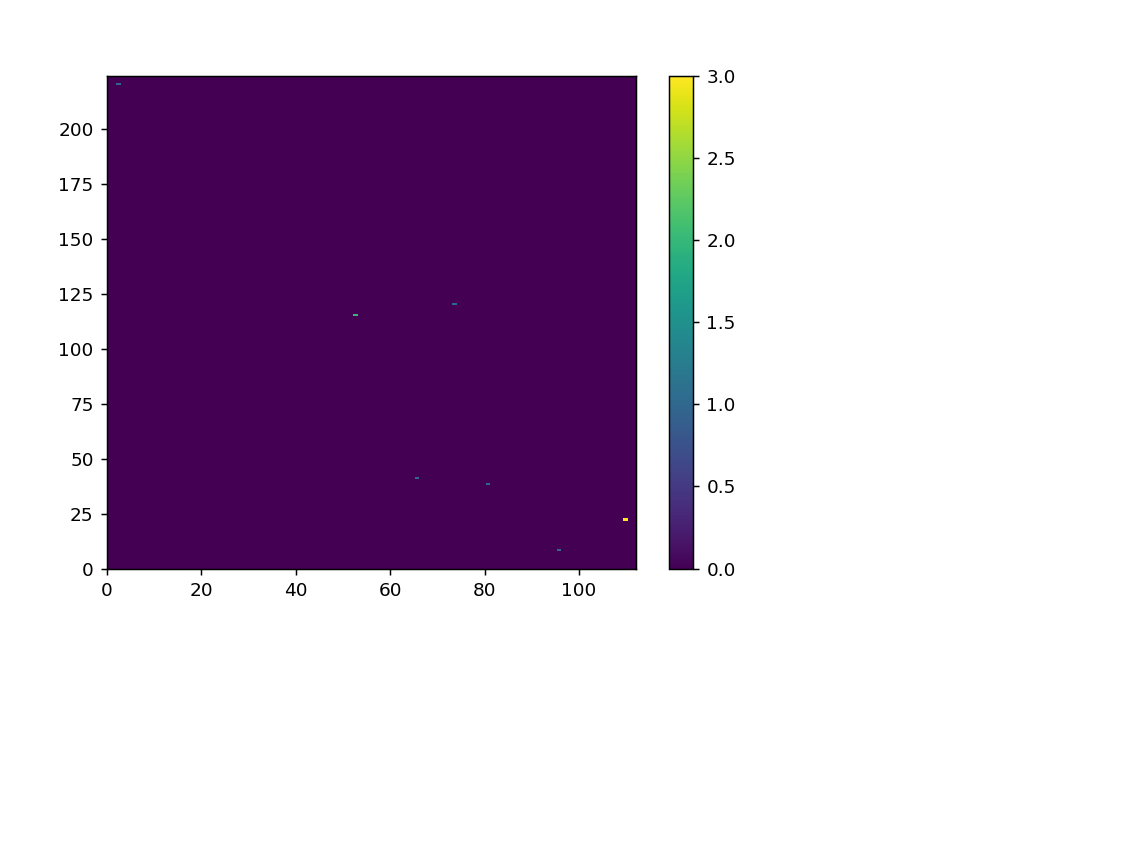

In [11]:
chip['data_rx'].set_en(True)
for _ in range(10):
    chip["fifo"].reset()
    time.sleep(0.002)

dt = 0.002
chip.reset_ibias()
chip.reset_ibias()
chip['fifo'].reset()
time.sleep(dt)
dat = chip.interpret_data(chip['fifo'].get_data())
#pix_tmp, cnt = np.unique(dat[['col', 'row']], return_counts=True)

print "%d hits found in %g s" % (len(dat), dt)
#for p, c in zip(pix_tmp, cnt):
#    print "%s %s" % (p, c)
plt.hist2d(dat["col"], dat["row"], bins=[112,224], range=[[0,112],[0,224]],
          )#norm=matplotlib.colors.LogNorm(vmin=1))
plt.colorbar()
plt.show()

In [10]:
# Automask, ma commentiamo alcuni pezzi
th = 2
step = 10
exp = 0.002 #0.2
max_pixels_before_giving_up = 10000

chip['data_rx'].set_en(True)
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)
chip.reset_ibias()

print("auto_mask th=%d step=%d exp=%f fl=%s" % (th, step, exp, chip.SET['fl']))
chip['CONF_SR'][chip.SET['fl']].setall(False)
chip['CONF_SR']['EN_OUT'][chip.fl_n] = False
chip['CONF_SR']['MASKD'].setall(False)
chip['CONF_SR']['MASKH'].setall(False)
chip['CONF_SR']['MASKV'].setall(False)
chip.write_conf()

chip['CONF_SR'][chip.SET['fl']].setall(True)
chip.write_conf()

for _ in range(10):
    chip["fifo"].reset()
    time.sleep(0.1)

pix = np.empty(224*112, dtype=[('flavor', 'u1'), ('col', 'u1'), ('row', '<u2')])
pix_i = 0

# Iterate over MASKH to find noisy pixels
for i in np.append(range(step, len(chip['CONF_SR']['MASKH']), step), 223):
    chip['CONF_SR']['MASKD'].setall(False)
    chip['CONF_SR']['MASKV'].setall(False)
    chip['CONF_SR']['MASKH'].setall(False)
    chip['CONF_SR']['MASKH'][i:0] = (int(i) + 1) * bitarray('1')
    for p_i in range(pix_i):
        chip.mask(pix[p_i]["flavor"], pix[p_i]['col'], pix[p_i]['row'])
    chip['CONF_SR'].write()

    # Set ibias to zero and back again to eliminate oscillations from mask switching
    chip.reset_ibias()
    chip.reset_ibias()
    chip['fifo'].reset()
    time.sleep(exp)
    dat = chip.interpret_data(chip['fifo'].get_data())

    pix_tmp, cnt = np.unique(dat[['col', 'row']], return_counts=True)
    print("Enable MASKH " + str(i) + " Noise data " + str(len(dat)))
    if len(pix_tmp) > max_pixels_before_giving_up:
        print("Too many noisy pixels, try smaller step.")
        raise Exception()
    for p_i, p in enumerate(pix_tmp):
        if cnt[p_i] < th:
            pass
        else:
            if not (0 <=  p['col'] <= 111 and 0 <=  p['row'] <= 223):
                print "Warning: invalid pixel with col,row = %d,%d" % (p['col'], p['row'])
                continue
            pix[pix_i]["col"] = p['col']
            pix[pix_i]["row"] = p['row']
            pix[pix_i]["flavor"] = chip.fl_n
            pix_i = pix_i + 1
    print("Number of noisy pixels: %d" % pix_i)

# Iterate over MASKV to find noisy pixels
for i in np.append(range(step, 111, step), 111):
    chip['CONF_SR']['MASKD'].setall(False)
    chip['CONF_SR']['MASKV'].setall(False)
    chip['CONF_SR']['MASKH'].setall(True)
    chip['CONF_SR']['MASKV'][i + (chip.fl_n * 112):(chip.fl_n * 112)] = (int(i) + 1) * bitarray('1')
    for p_i in range(pix_i):
        chip.mask(pix[p_i]["flavor"], pix[p_i]['col'], pix[p_i]['row'])
    chip['CONF_SR'].write()

    # Set ibias to zero and back again to eliminate oscillations from mask switching
    chip.reset_ibias()
    chip.reset_ibias()

    chip['fifo'].reset()
    time.sleep(exp)
    dat = chip.interpret_data(chip['fifo'].get_data())

    pix_tmp, cnt = np.unique(dat[['col', 'row']], return_counts=True)
    print("Enable MASKV " + str(i) + " Noise data " + str(len(dat)))
    if len(pix_tmp) > max_pixels_before_giving_up:
        print("Too many noisy pixels, try smaller step.")
        raise Exception()
    for p_i, p in enumerate(pix_tmp):
        if cnt[p_i] < th:
            pass
        else:
            if not (0 <=  p['col'] <= 111 and 0 <=  p['row'] <= 223):
                print "Warning: invalid pixel with col,row = %d,%d" % (p['col'], p['row'])
                continue
            pix[pix_i]["col"] = p['col']
            pix[pix_i]["row"] = p['row']
            pix[pix_i]["flavor"] = chip.fl_n
            pix_i = pix_i + 1
    print("Number of noisy pixels: %d" % pix_i)

# Iterate over MASKD to find noisy pixels
for i in np.append(range(step, len(chip['CONF_SR']['MASKD']) - 1, step), len(chip['CONF_SR']['MASKD']) - 1):
    chip['CONF_SR']['MASKD'].setall(False)
    chip['CONF_SR']['MASKV'][(chip.fl_n + 1) * 112-1:(chip.fl_n * 112)] = (int(112)) * bitarray('1')
    chip['CONF_SR']['MASKH'].setall(True)
    chip['CONF_SR']['MASKD'][i:0] = (int(i)+1)*bitarray('1')
    for p_i in range(pix_i):
        chip.mask(pix[p_i]["flavor"], pix[p_i]['col'], pix[p_i]['row'])
    chip['CONF_SR'].write()

    # Set ibias to zero and back again to eliminate oscillations from mask switching
    chip.reset_ibias()
    chip.reset_ibias()

    chip['fifo'].reset()
    time.sleep(exp)
    dat = chip.interpret_data(chip['fifo'].get_data())

    pix_tmp, cnt = np.unique(dat[['col', 'row']], return_counts=True)
    print("Enable MASKD " + str(i) + " Noise data " + str(len(dat)))

    if len(pix_tmp) > max_pixels_before_giving_up:
        print("Too many noisy pixels, try smaller step.")
        raise Exception()
    for p_i, p in enumerate(pix_tmp):
        if cnt[p_i] < th:
            pass
        else:
            if not (0 <=  p['col'] <= 111 and 0 <=  p['row'] <= 223):
                print "Warning: invalid pixel with col,row = %d,%d" % (p['col'], p['row'])
                continue
            pix[pix_i]["col"] = p['col']
            pix[pix_i]["row"] = p['row']
            pix[pix_i]["flavor"] = chip.fl_n
            pix_i = pix_i + 1
    print("Number of noisy pixels: %d" % pix_i)

# Mask all previously found pixels and check again
for p_i in range(pix_i):
    chip.mask(pix[p_i]["flavor"], pix[p_i]['col'], pix[p_i]['row'])
chip['CONF_SR'].write()

# Set ibias to zero and back again to eliminate oscillations from mask switching
chip.reset_ibias()
chip.reset_ibias()

chip['fifo'].reset()
time.sleep(exp)
dat = chip.interpret_data(chip['fifo'].get_data())
pix_tmp, cnt = np.unique(dat[['col', 'row']], return_counts=True)
print("Checking noisy pixels after masking...")
print("Data size: " + str(len(dat)))
if len(pix_tmp) > max_pixels_before_giving_up:
    print("Too many noisy pixels, try smaller step.")
    raise Exception()
for p_i, p in enumerate(pix_tmp):
    if cnt[p_i] < th:
        pass
    else:
        if not (0 <=  p['col'] <= 111 and 0 <=  p['row'] <= 223):
            print "Warning: invalid pixel with col,row = %d,%d" % (p['col'], p['row'])
            continue
        pix[pix_i]["col"] = p['col']
        pix[pix_i]["row"] = p['row']
        pix[pix_i]["flavor"] = chip.fl_n
        pix_i = pix_i + 1
print("Number of noisy pixels: %d" % pix_i)

# Mask additionally found noisy pixels
for p_i in range(pix_i):
    chip.mask(pix[p_i]["flavor"], pix[p_i]['col'], pix[p_i]['row'])
chip['CONF_SR'].write()
chip['fifo'].reset()
time.sleep(0.3)
pix = np.unique(pix[:pix_i])
print("Noisy pixels: " + str(pix))
print("Total number of noisy pixels: " + str(len(pix)))

chip.reset_ibias()

# Get mask from register settings
mask = chip.get_disabled_pixel(maskV=chip['CONF_SR']['MASKV'], maskH=chip['CONF_SR']['MASKH'], maskD=chip['CONF_SR']['MASKD'])
total_enabled = np.shape(np.argwhere(mask[(chip.fl_n * 112):(chip.fl_n + 1) * 112, :] != 0))[0]
total_disabled = np.shape(np.argwhere(mask[(chip.fl_n * 112):(chip.fl_n + 1) * 112, :] == 0))[0]
print("Number of enabled pixels: {}".format(str(total_enabled)))
print("Number of disabled pixels (noisy plus unintentionally masked): {}".format(str(total_disabled))) 


auto_mask th=2 step=10 exp=0.002000 fl=EN_HV
Enable MASKH 10 Noise data 973
Number of noisy pixels: 19
Enable MASKH 20 Noise data 11680
Number of noisy pixels: 39
Enable MASKH 30 Noise data 7787
Number of noisy pixels: 62
Enable MASKH 40 Noise data 9490
Number of noisy pixels: 90
Enable MASKH 50 Noise data 10707
Number of noisy pixels: 113
Enable MASKH 60 Noise data 9490
Number of noisy pixels: 145
Enable MASKH 70 Noise data 22316
Number of noisy pixels: 178
Enable MASKH 80 Noise data 10706
Number of noisy pixels: 211
Enable MASKH 90 Noise data 20075
Number of noisy pixels: 246
Enable MASKH 100 Noise data 12775
Number of noisy pixels: 281
Enable MASKH 110 Noise data 14844
Number of noisy pixels: 315
Enable MASKH 120 Noise data 13627
Number of noisy pixels: 343
Enable MASKH 130 Noise data 12045
Number of noisy pixels: 381
Enable MASKH 140 Noise data 12166
Number of noisy pixels: 413
Enable MASKH 150 Noise data 10585
Number of noisy pixels: 447
Enable MASKH 160 Noise data 25307
Number of

Number of enabled pixels: 2657
Number of disabled pixels (noisy plus unintentionally masked): 22431


In [ ]:
#chip['data_rx'].set_en(True)
#for _ in range(5):
#    chip['fifo'].reset()
#    time.sleep(0.002)
#chip.reset_ibias()
#chip.auto_mask(th=20, step=10, exp=0.002)

In [ ]:
### stop oscillation
chip.reset_ibias()

In [ ]:
### check noise occupancy
exp_time=1
chip['data_rx'].set_en(True)
chip.reset_ibias()
for _ in range(10):
    chip['fifo'].reset()
    time.sleep(0.002) 
time.sleep(exp_time)
x = chip['fifo'].get_data()
ix = chip.interpret_data(x)
print(len(ix))
uni,cnt=np.unique(ix[["col","row"]],return_counts=True)
arg=np.argsort(cnt)
for a_i,a in enumerate(arg[::-1]):
    print uni[a],cnt[a]
    chip.mask(3,uni[a][0],uni[a][1])
chip.write_conf()

In [ ]:
## configure injection pulse and inject pulses to one pixel
col=18
row=25

delay=800
width=250
repeat=100
chip['inj'].set_delay(delay)
chip['inj'].set_width(width)
chip['inj'].set_repeat(repeat)
chip['inj'].set_phase(0)
chip['inj'].set_en(0)

chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
chip.enable_injection(3,col,row)
chip.write_conf()
chip.reset_ibias()

chip['data_rx'].set_en(True)
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)
chip["inj"].start()
while not chip['inj'].is_ready:
    time.sleep(0.001)
time.sleep(0.2)
print chip['fifo'].get_fifo_size()
x = chip['fifo'].get_data()
ix = chip.interpret_data(x)
uni,cnt=np.unique(ix[["col","row"]],return_counts=True)
arg=np.argsort(cnt)
for a_i,a in enumerate(arg[::-1]):
    print uni[a],cnt[a]
chip['data_rx'].set_en(False)

## INJECTION SCANS -  S-CURVE

In [ ]:
injlist=np.arange(80,0,-1)

inj_low=chip.get_vl_dacunits()
chip['data_rx'].set_en(True)
for _ in range(5):
    chip['fifo'].reset()
    time.sleep(0.002)

cnt=np.empty(len(injlist))
tot=np.empty(len(injlist))
for inj_i,inj in enumerate(injlist):
    chip.set_vh_dacunits(inj+inj_low,0)
    chip.write_conf()
    for _ in range(5):
        chip['fifo'].reset()
        time.sleep(0.002)
    chip.set_monoread()
    chip["inj"].start()
    while not chip['inj'].is_ready:
        time.sleep(0.001)
    time.sleep(0.02)
    x = chip['fifo'].get_data()
    ix = chip.interpret_data(x)
    ix_inj=ix[np.bitwise_and(ix["col"]==col,ix["row"]==row)]
    print inj,len(ix),len(ix_inj),np.average((ix_inj["te"]-ix_inj["le"]) & 0x3F)
    cnt[inj_i]=len(ix_inj)
    tot[inj_i]=np.average((ix_inj["te"]-ix_inj["le"]) & 0x3F)

In [ ]:
### plot

print "approx. th=",injlist[np.argmin(np.abs(cnt-repeat/2))],"DAC",injlist[np.argmin(np.abs(cnt-repeat/2))]*CALCAP,"e"
fig,ax=plt.subplots(1,1)
ax.plot(injlist,cnt,"C0o",label="count")
ax2=ax.twiny()
ax3=ax.twinx()
ax3.plot(injlist,tot,"C1x",label="ToT")
ax.plot([],[],"C1x",label="ToT")

ax.set_xlabel("Injection [ADC]")
ax.set_ylabel("#")
ax3.set_ylabel("ToT [40MHz]")
ax2.set_xlabel("Charge [e]")
ax.set_xbound(np.min(injlist),np.max(injlist))
ax2.set_xbound(np.min(injlist)*CALCAP,np.max(injlist)*CALCAP)
ax.legend()